In [1]:
import pandas as pd
import numpy as np

In [2]:
def block_recognition(file):
    a=False # first block'<'
    b=False # second block '<'
    c=False # third block '>'
    d=False # fourth block'>'
    i=0
    O_boundary=pd.DataFrame((), columns=[])
    Oh=[]
    aOh1=[]
    Ol=[]
    aOl1=[]
    bOh=[]
    bOl=[]
    block=[]
    l=0
    check=True
    ## Because the building block is constructing the structure in a such way that 
    while i<len(file):
        if l<32:
            
            
            # Check for first '<' and print'<' if there is and a=True
            if a==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==3 and file.iloc[i+9]['type']==4: #Check for first '<' block
                a=True
                check=False
                block+=['<l','<l','<l','<l','<l','<l','<l','<l','<l','<l']
                k=i+10
                i=k
            if a==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==6 and file.iloc[i+9]['type']==8: #Check for first '<' block
                a=True
                check=False
                block+=['<l','<l','<l','<l','<l','<l','<l','<l','<l','<l']
                k=i+10
                i=k

           #search for second '<' and print '<' if found b=True 
            if  a==True and b==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4 and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4:
                b=True
                check=True
                Oh+=[file.iloc[i+5]['id']]
                block+=['<r','<r','<r','<r','<r','<r','<r','<r']
                k=i+8
                i=k
            if  a==True and b==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4 and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==6 and file.iloc[i+7]['type']==8:
                b=True
                check=True
                Oh+=[file.iloc[i+5]['id']]
                block+=['<r','<r','<r','<r','<r','<r','<r','<r']
                k=i+8
                i=k

            if a==True and b==True and c==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4:
                c=True
                check=False
                k=i+8
                block+=['>l','>l','>l','>l','>l','>l','>l','>l']
                i=k
            if a==True and b==True and c==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==6 and file.iloc[i+7]['type']==8:
                c=True
                check=False
                block+=['>l','>l','>l','>l','>l','>l','>l','>l']
                k=i+8
                i=k
            if a==True and b==True and c==True and d==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==3 and file.iloc[i+9]['type']==4:
                d=True
                Ol+=[file.iloc[i+5]['id']]
                block+=['>r','>r','>r','>r','>r','>r','>r','>r','>r','>r']
                k=i+10
                check=True
                i=k
            if a==True and b==True and c==True and d==False and file.iloc[i]['type']==1 and file.iloc[i+1]['type']==2 and file.iloc[i+2]['type']==3 and file.iloc[i+3]['type']==4  and file.iloc[i+4]['type']==3 and file.iloc[i+5]['type']==4 and file.iloc[i+6]['type']==3 and file.iloc[i+7]['type']==4 and file.iloc[i+8]['type']==6 and file.iloc[i+9]['type']==8:
                d=True
                Ol+=[file.iloc[i+5]['id']]
                block+=['>r','>r','>r','>r','>r','>r','>r','>r','>r','>r']
                k=i+10
                check=True
                i=k

            #Look if the cell is fully completed, i.e. if '<''<' and '>' '>' has been found
            if a==True and b==True and c==True and d==True :
                a=False
                b=False
                c=False
                d=False
                l+=1
                check=True
            if file.iloc[i]['type']==5 or file.iloc[i]['type']==7:
                block+=['water']
                i+=1
            else:
                
                if check==False:
                    i+=1
                    block+=['bridge']
                if check==True: 
                    block+=['-']
                    #print(file.iloc[i]['type'])
                    i+=1
        
        if l==32:
            if file.iloc[i]['type']==5 or file.iloc[i]['type']==7:
                check=True
                block+=['water']
                i+=1
            else:
                i+=1
                block+=['-']
    ### Addin the collumn to define the block 
    file['block']=block

    #adding a collumn that describe to which cell/cell boundary the item belongs 
    # if 0 it belong to upper or lower layer

    O_boundary['Ohid']=Oh
    O_boundary['Olid']=Ol
    return O_boundary, file


In [3]:
def O_boundarysearch(final, O_boundary): 
    Oh=[]
    Ol=[]
    for index, boundary in O_boundary.iterrows():
        for index, point in final.iterrows():
            if float(point['id'])==boundary['Ohid']: 
                Oh+=[[point['x'],point['y'],point['z']]]
            if float(point['id'])==boundary['Olid']: 
                Ol+=[[point['x'],point['y'],point['z']]]
    O_boundary['Oh']=Oh
    O_boundary['Ol']=Ol
    return O_boundary



In [4]:
def Cell_planes(O_boundary, df_location):
#### Defining the datafram that contain the normals of a cell, i.e. 4 collumns
    Cellplanes=pd.DataFrame((), columns=[])
    na1=[]
    na0=[]
    nb0=[]
    nb1=[]
    out=[]
    idl=[]
    ### Looping over all the cells and check if they have the corrext neighbours
    for k in range(0, len(O_boundary)):
        ### na1 direction of a1
        ### direction of a0
        k=(k)
        l=(df_location.iloc[k]['b0'])
        if l!='-': 
            l=int(l)
        n=(df_location.iloc[k]['a1'])
        i=0
        if n!='-':
            n=int((df_location.iloc[k]['a1']))
            m=(df_location.iloc[n]['b0'])
            if m!='-':
                m=int(m)
                # normal in a>0 direction
                na1+=[normal_plane(np.array(O_boundary.iloc[l]['Ol']),np.array(O_boundary.iloc[k]['Ol']),np.array(O_boundary.iloc[k]['Oh']),np.array(O_boundary.iloc[l]['Oh']))]
                # normal in a<0 direction
                na0+=[normal_plane(np.array(O_boundary.iloc[n]['Ol']),np.array(O_boundary.iloc[m]['Ol']),np.array(O_boundary.iloc[m]['Oh']),np.array(O_boundary.iloc[n]['Oh']))]
                #normal in b<0 direction
                nb0+=[normal_plane(np.array(O_boundary.iloc[k]['Ol']),np.array(O_boundary.iloc[n]['Ol']),np.array(O_boundary.iloc[n]['Oh']),np.array(O_boundary.iloc[k]['Oh']))]
                #normal in b>0 direction
                nb1+=[normal_plane(np.array(O_boundary.iloc[m]['Ol']),np.array(O_boundary.iloc[l]['Ol']),np.array(O_boundary.iloc[l]['Oh']),np.array(O_boundary.iloc[m]['Oh']))]
                idl+=[k]
            else:
                out+=[k]
        else:
            out+=[k]

## Associating into the associatate dataframe
    Cellplanes['na1']=na1
    Cellplanes['na0']=na0
    Cellplanes['nb0']=nb0
    Cellplanes['nb1']=nb1
    Cellplanes['id']=idl
    return Cellplanes

In [5]:
def normal_plane(point1, point2, point3,point4):
    vector1=point2-point1
    vector2=(point3+point4)/2-point1
    n=np.cross(vector1,vector2)
    d=-(n@point1)
    plane=[n[0],n[1],n[2],d]
    return np.array(plane)

In [6]:
def row(final,file, Cellplanes):
    i=0
    final['block']='-'
    final['cell']=-1
    final['row']=-1
    final['charge']=-9
    n=np.cross(np.array([26.9408000000,0,0]),np.array([-16.2851800000,24.8380840000,0]))
    d=-(n@np.array([1.4075400000/2,-12.4191160000/2,27.9873670000/2]))
    z=np.array([n[0],n[1],n[2],d])
    zi=[]
    for i in range(0,len(final)):
        final.at[i,'block']=file.at[int(final.at[i,'id'])-1, 'block']
        final.at[i,'charge']=file.at[int(final.at[i,'id'])-1, 'charge']

        point2=np.array([final.iloc[i]['x'],final.iloc[i]['y'],final.iloc[i]['z'], 1])
        a01=(point2@Cellplanes.iloc[0]['na1'])
        a00=(point2@Cellplanes.iloc[0]['na0'])
        a10=(point2@Cellplanes.iloc[6]['na0'])
        a11=(point2@Cellplanes.iloc[6]['na1'])
        a20=(point2@Cellplanes.iloc[12]['na0'])
        a21=(point2@Cellplanes.iloc[12]['na1'])
        a30=(point2@Cellplanes.iloc[16]['na0'])
        a31=(point2@Cellplanes.iloc[16]['na1'])
        if a00>=0 and final.iloc[i]['row']==-1 and a01>=0 :
            final.at[i,'row']=0
        if a10>=0 and final.iloc[i]['row']==-1 and a11>=0:
            final.at[i,'row']=1
        if a20>=0 and final.iloc[i]['row']==-1 and a21>=0 :
            final.at[i,'row']=2
        if a30>=0 and final.iloc[i]['row']==-1 and a31>=0 :
            final.at[i,'row']=3
        if a01<0 and final.iloc[i]['row']==-1:
            final.iloc[i]['x']+=26.9408000000
            final.at[i,'row']=3
        if final.iloc[i]['row']==-1: 
            final.at[i,'row']=3
        #if final.iloc[i]['row']==-1:
         #   if a01<0:
          #      final.iloc[i]['x']+=26.9408000000
           #     final.at[i,'row']=3
            #else:
    return final

/var/folders/3l/t1b8s9zn4kx6n39hvjfmdtkc0000gn/T/ipykernel_20006/4182914617.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.iloc[i]['x']+=26.9408000000


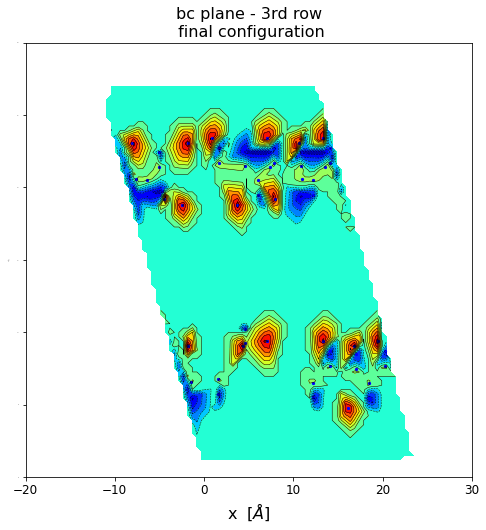

/var/folders/3l/t1b8s9zn4kx6n39hvjfmdtkc0000gn/T/ipykernel_20006/4182914617.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.iloc[i]['x']+=26.9408000000


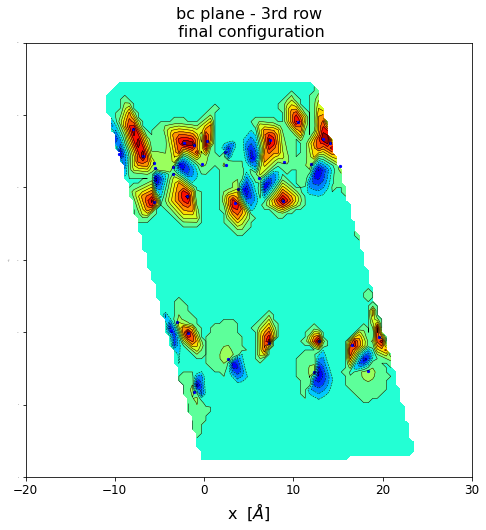

/var/folders/3l/t1b8s9zn4kx6n39hvjfmdtkc0000gn/T/ipykernel_20006/4182914617.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.iloc[i]['x']+=26.9408000000


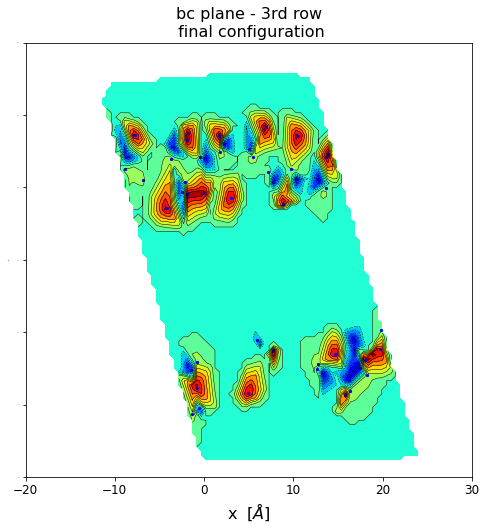

/var/folders/3l/t1b8s9zn4kx6n39hvjfmdtkc0000gn/T/ipykernel_20006/4182914617.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.iloc[i]['x']+=26.9408000000


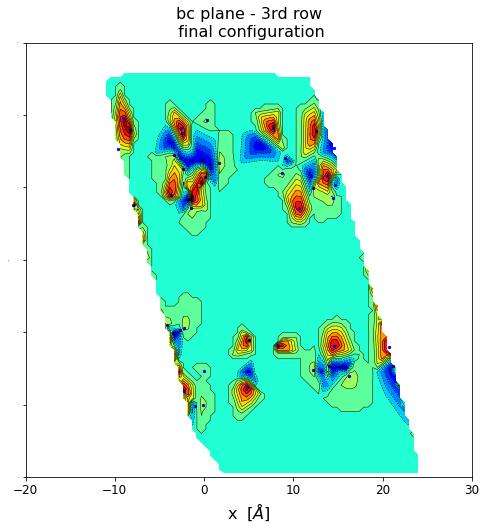

/var/folders/3l/t1b8s9zn4kx6n39hvjfmdtkc0000gn/T/ipykernel_20006/4182914617.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.iloc[i]['x']+=26.9408000000


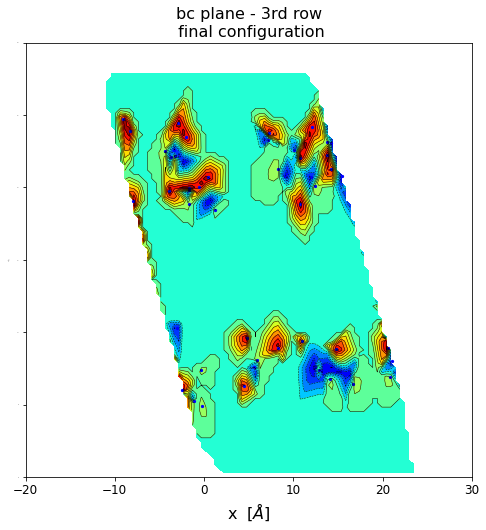

/var/folders/3l/t1b8s9zn4kx6n39hvjfmdtkc0000gn/T/ipykernel_20006/4182914617.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.iloc[i]['x']+=26.9408000000


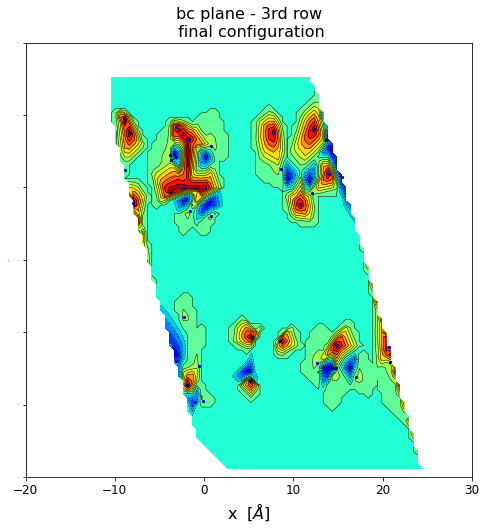

/var/folders/3l/t1b8s9zn4kx6n39hvjfmdtkc0000gn/T/ipykernel_20006/4182914617.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final.iloc[i]['x']+=26.9408000000


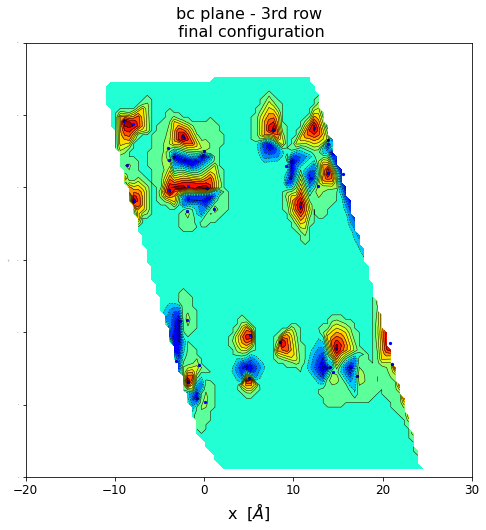

In [14]:
initial=pd.read_csv('data/qualitative/data_lmpo0001.lmp', delim_whitespace=True, skiprows=28, nrows=2025, names=['id','mol','type','charge','x','y','z','cell', 'block','zi'])
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
O_boundaryi, initial=block_recognition(initial)

df=pd.read_csv('data/output/timestep.txt', delim_whitespace=True)
df_location=pd.read_csv('data/output/location.txt',delim_whitespace=True)
#display(df_location)
time=0
tl=-1
for index, i in df.iterrows():
    plt.figure(figsize=(8, 8))
    t=i['atoms']
    final=pd.read_csv('data/qualitative/all.dump', delim_whitespace=True, skiprows=t, nrows=2025, names=['id','type','x','y','z','vx','vy','vz','fx','fy','fz','cell', 'block','zi'])
    O_boundaryf=O_boundarysearch(final, O_boundaryi)
    cellplanes=Cell_planes(O_boundaryf, df_location)
    final=row(final, initial,cellplanes)
    #display(rows)
    x=[]
    y=[]
    z=[]
    charge=[]
    xm=[]
    ym=[]
    for index, point in final.iterrows():
        if point['row']==2:#and point['block']=='-':
            x+=[point['x']]
            y+=[point['y']]
            z+=[point['z']]
            if point['block']=='-':
                charge+=[point['charge']]
                xm+=[point['y']]
                ym+=[point['z']]
            else:
                charge+=[0]
    dfi=pd.DataFrame(())
    #dfi['x']=y
    #dfi['y']=z
    #dfi['z']=z
    #dfi['charge']=charge
    from scipy.interpolate import griddata
    # define grid.
    # https://scipy-cookbook.readthedocs.io/items/Matplotlib_Gridding_irregularly_spaced_data.html
    xi = np.linspace(-20,30,100)
    yi = np.linspace(0,30,100)
    # grid the data.
    zi = griddata((y, z), charge, (xi[None,:], yi[:,None]), method='linear')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k', vmin = -1.5,vmax = 2)
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet, vmin = -1.5,vmax = 2)

    
    #cbar=plt.colorbar() 
    #cbar.set_label(label=r'charges [$C$]',size=16)
    # draw colorbar
    # plot data points.
    plt.xlabel(r'x  [$\AA$]', fontsize=16)
    plt.ylabel(r'y  [$\AA$]', fontsize=0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=0)
    
    plt.title('bc plane - 3rd row\n final configuration', fontsize=16)

    plt.autoscale(enable=True, axis='both')
    plt.scatter(xm,ym,marker='o',c='b',s=5)
    plt.autoscale(enable=True, axis='both')
    plt.show()
    #sns.jointplot(
    #data=dfi, x="x", y="y",
    #marker="+", s=100, marginal_kws=dict(bins=100, fill=False), hue='charge')